# DBSCAN

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import dbscan
from sklearn.datasets import make_blobs

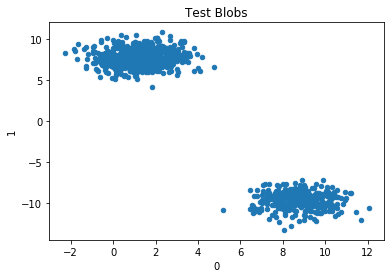

In [31]:
# Create Blobs
df = pd.DataFrame(make_blobs(1000)[0])

df.plot(
    x=0, 
    y=1, 
    kind="scatter",
    title="Test Blobs"
)
plt.show()

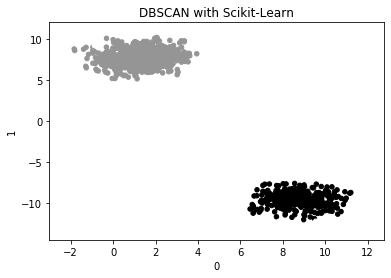

In [46]:
# Create labels using DBSCAN
df["labels"] = dbscan(df)[1]

# Plot the labels
df.plot(
    x=0,
    y=1,
    kind="scatter",
    title="DBSCAN with Scikit-Learn",
    c="labels",
    colorbar=False
)

plt.show()

In [59]:
# Implement by hand

class dbscan2():
    def __init__(self,df, epsilon=0.5, min_points=5):
        self.df = df
        self.epsilon = epsilon
        self.min_points = min_points
        
    def fit(self):
        "Fit the data"
        pass
    
    def predict(self):
        "Return the predicted labels"
        pass

test = dbscan2(df, 1, 2)
print(test.epsilon)
print(test.min_points)

1
2


In [67]:
def euclid_distance(df):
    pass

for x in range(len(df)):
    for y in range(len())
    

3.416922674084308
0.5268864833670144
0.4390036401268039
-0.9584765119922689
7.366988855724074
2.0133868997188853
1.4655190334894377
0.8205775600616404
0.4972974060724373
1.3370490382844844
7.873544193987873
9.060721751500642
7.989552504376656
-0.6207461041423337
0.22016584746525347
0.4638500186706376
8.280324597581172
-0.3294545202843173
9.171778603401977
10.083794122412936
8.598297833623644
1.069268190683678
0.9095691303094208
1.1082808552908945
-0.02879841715610898
-0.9663250026370718
0.7039272421293707
2.2805863906824
1.2651522990285715
3.0654172675990132
0.9543049341584093
8.377087005629711
2.617138447227394
1.9144392640627472
-0.39262505890013477
1.3848068262044824
9.493399829007913
7.5912320307929
0.8329084857288314
9.200266871486829
9.776494211404046
-0.5323006810428983
3.058997800345061
1.8808998469036886
0.7039481524238294
1.1901313093850199
0.16706838592378492
0.5051774594353311
2.6910778629280507
0.45551676182819056
1.3541195561602937
7.08117245801532
8.42857089002671
7.9887

In [64]:
df[0][0]

3.416922674084308